In [432]:
# importing all the required libraries for this workbook: 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import tweepy
from tweepy import OAuthHandler
import os
import time
import datetime
from timeit import default_timer as timer
import seaborn as sb


%matplotlib inline

# display full string from a pandas DataFrame
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

 [Introduction](#introduction)
 
 [Data Gathering Part](#data_gathering)
 
 1. [Enhanced Tweeter Archive](#enhanced_twitter_archive)
 2. [Image Prediction](#image_prediction)
 3. [Tweet JSON Data](#tweet_json_data)
 
[Assessing Data](#assessing_data)

 1. [Twitter Archive Data](#twitter_archive_data)
 2. [Image Prediction Data](#image_prediction_data)
 3. [JSON Data](#json_data_assessment)
 
[Assessment Summary](#assessment_summary)

[Data Clearning](#data_cleaning)

[Data Analysis and Vizualization](#data_analysis)

By Kathy Mirzaei

# Introduction: 
<a id="introduction"></a>

"We Rate Dogs" is a Twitter account that rates people's dogs with a humorous comment about the dog. This Twitter archive contains over 5000 tweets, which have been filtered to create the enhanced archive that forms the basis of this analysis. The goal of this project is to wrangle the data; gather, assess, and clean the data into a tidy dataset, and then provide analyses and visualizations.

# Data Gathering Part:
<id a="data_gathering_part"></a>

### 1. Enhanced Twitter Archive
<a id="enhanced_twitter_archive"></a>


The `WeRateDogs Twitter archive` is provided by Udacity

In [262]:
#Opening the `WeRateDogs Twitter archive`: 

tweet_archive=pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [263]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

`Sample Tweet Data`

Below is a sample of one of the tweets I have chosen to display:

In [133]:
#lets take a look at one tweet as a sample:
sample_tweet = twit_archive.iloc[1]
sample_tweet

tweet_id                      892177421306343426                                                                                                                                                
in_reply_to_status_id         NaN                                                                                                                                                               
in_reply_to_user_id           NaN                                                                                                                                                               
timestamp                     2017-08-01 00:17:27 +0000                                                                                                                                         
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                                
text                          This 

In [134]:
sample_tweet.text

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [135]:
sample_tweet.expanded_urls

'https://twitter.com/dog_rates/status/892177421306343426/photo/1'

### 2. Image Prediction 
<a id="image_prediction"></a>

File: image_predictions.tsv
This file contains the tweet image predictions(e.g. what breed of dog is present in each tweet according to a neural network). This file was downloaded using the Requests library with the following URL mentioned in Project Details: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [88]:

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
response = requests.get(url)
response


<Response [200]>

response 200 means request has been successful

In [89]:
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [90]:
images = url.split('/')[-1]

with open(os.path.join('./', images), mode = 'wb') as file:
    file.write(response.content)

In [91]:
# read image predictions file into a DataFrame
df_prd = pd.read_csv(images, sep = '\\t', engine = 'python')
df_prd.info()
df_prd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [92]:
#lets check one row of data: 
sample_prd = df_prd.iloc[1]
sample_prd

tweet_id    666029285002620928                             
jpg_url     https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
img_num     1                                              
p1          redbone                                        
p1_conf     0.506826                                       
p1_dog      True                                           
p2          miniature_pinscher                             
p2_conf     0.0741917                                      
p2_dog      True                                           
p3          Rhodesian_ridgeback                            
p3_conf     0.07201                                        
p3_dog      True                                           
Name: 1, dtype: object

### 3. Tweet_JSON Data
<a id="tweet_json_data"></a>

Using the tweet IDs in the `WeRateDogs Twitter archive`, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

**Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [156]:
#Twitter API, Secret, and Token [personal]
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

consumer_key = 'hidden'
consumer_secret = 'hidden'
access_token = 'hidden'
access_secret = 'hidden'

In [157]:
# Creating the Twitter API object and set rate limit params

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler = auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [158]:
tweet_ids = tweet_archive.tweet_id.values
print("# of tweet_ids: " + str(len(tweet_ids)) + "\n")

# of tweet_ids: 2356



downloading tweets:


In [159]:
# Lets create a list of tweet_ids from the `WeRateDogs Twitter archive` to use for downloading the Twitter API

tweet_ids = tweet_archive.tweet_id.values
print("# of tweet_ids: " + str(len(tweet_ids)) + "\n")

count = 0
tweet_json_list = []
fails_dict = {}

start_time = time.time()

for tweet_id in tweet_ids:
    count += 1
    try:
        # attempt to get the tweet's JSON data and append to the tweet JSON list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_json_list.append(tweet._json)
    except tweepy.TweepError as err:
        # save the error to the fail dictionary for review
        print("TweepError for id:  " + str(tweet_id))
        fails_dict[tweet_id] = err
        pass
    # To save space, only print out tweet id for every 100th tweet
    if count % 100 == 0:
        print("loop # " + str(count))

elapsed_time = time.time() - start_time

elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nTime elapsed (HH:MM:SS):  " + elapsed_time_str + "\n")

# display list of tweets with errors
print("Number of TweepErrors:  {}\n".format(len(fails_dict)))
for tweet_id in fails_dict:
    print(tweet_id, fails_dict[tweet_id])

# of tweet_ids: 2356

TweepError for id:  888202515573088257
TweepError for id:  873697596434513921
loop # 100
TweepError for id:  872668790621863937
TweepError for id:  872261713294495745
TweepError for id:  869988702071779329
TweepError for id:  866816280283807744
TweepError for id:  861769973181624320
TweepError for id:  856602993587888130
loop # 200
TweepError for id:  851953902622658560
TweepError for id:  845459076796616705
TweepError for id:  844704788403113984
TweepError for id:  842892208864923648
TweepError for id:  837366284874571778
TweepError for id:  837012587749474308
loop # 300
TweepError for id:  829374341691346946
TweepError for id:  827228250799742977
loop # 400
loop # 500
TweepError for id:  812747805718642688
TweepError for id:  802247111496568832
loop # 600
loop # 700
TweepError for id:  779123168116150273
TweepError for id:  775096608509886464
loop # 800
TweepError for id:  770743923962707968


Rate limit reached. Sleeping for: 783


loop # 900
TweepError for id:  754011816964026368
loop # 1000
loop # 1100
loop # 1200
loop # 1300
loop # 1400
loop # 1500
loop # 1600
loop # 1700
TweepError for id:  680055455951884288


Rate limit reached. Sleeping for: 784


loop # 1800
loop # 1900
loop # 2000
loop # 2100
loop # 2200
loop # 2300

Time elapsed (HH:MM:SS):  00:31:22

Number of TweepErrors:  23

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 [{'code': 144, 'message': 'No status found with that I

#### Saving JSON data to file

In [166]:
tweet_json_file = 'tweet_json.txt'

In [167]:

# saving the JSON data:
with open(tweet_json_file, 'w') as outfile:
    for tweet_json in tweet_json_list:
        json.dump(tweet_json, outfile)
        outfile.write('\n')

        


#### JSON file info into a dataframe

Extracting the fields required from each tweet's JSON data and storing it in a separate file (tweet_data_extract.csv) to be used for the next steps.

In [169]:
#first read the data into a dataframe:
tweet_json_data = []

with open(tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
df_tweet_data_extract = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df_tweet_data_extract.head(30)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7861,36908
1,892177421306343426,5834,31762
2,891815181378084864,3853,23932
3,891689557279858688,8026,40224
4,891327558926688256,8685,38421
5,891087950875897856,2891,19333
6,890971913173991426,1906,11263
7,890729181411237888,17567,62237
8,890609185150312448,3988,26602
9,890240255349198849,6834,30446


In [170]:

df_tweet_data_extract.to_csv('tweet_data_extract.csv', index = False)

# Assessing Data
<a id="assessing_data"></a>

In this section I am going to assess the data that was gathered from different sources, both visually and programmatically for quality and tidiness issues. I will refer to the key points required for this data wrangling mentioned below. 

The quality of the data is assessed against the 4 dimensions concerning the content: completeness, validity, accuracy and consistency.

Tidiness of the data is assessed with regards to the structure of the data (e.g.missing values, duplicates,etc.)


*Key points to keep in mind when data wrangling for this project:*

-  You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
-  Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
-  Cleaning includes merging individual pieces of data according to the rules of tidy data.
-  The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
-  You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

In [201]:
# First, I am loading all the gathered data in the three sections above as archive, predictions, and json_data: 

archive = pd.read_csv('twitter-archive-enhanced.csv')
predictions = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
json_data= pd.read_csv('tweet_data_extract.csv')

### 1) Twitter archive data
<a id="twitter_archive_data"></a>

In [190]:
archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [192]:
archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [193]:
# curious to see the value count for the "a" names or if there are any other inlvalid strings in the name column:
archive.name.value_counts().head(50)

None        745
a           55 
Charlie     12 
Cooper      11 
Lucy        11 
Oliver      11 
Tucker      10 
Lola        10 
Penny       10 
Bo          9  
Winston     9  
the         8  
Sadie       8  
an          7  
Bailey      7  
Daisy       7  
Buddy       7  
Toby        7  
Bella       6  
Dave        6  
Jax         6  
Leo         6  
Milo        6  
Jack        6  
Scout       6  
Stanley     6  
Koda        6  
Rusty       6  
Oscar       6  
Alfie       5  
Louis       5  
Oakley      5  
Bentley     5  
Finn        5  
Larry       5  
Phil        5  
Sunny       5  
Chester     5  
very        5  
Gus         5  
George      5  
Sammy       5  
Maggie      4  
Shadow      4  
Brody       4  
quite       4  
Reginald    4  
Moose       4  
Clark       4  
Jerry       4  
Name: name, dtype: int64

We see "a", "the", and "and" are the only names that starts with a lower case. They are not really dog names, are they?

>Observations from head/tail fucntion:

*Quality:*

- The timestamp column has dates in string form.
- Some of the rows from the tail() output above have invalid strings in the name column, e.g. "a". 
- Values of "None" in the name column.

*Tidiness:*

- All the numerical values are located at the end of the table, and all long strings are at the beginning or left of the table. This makes it very difficult to quickly see the data and find relations. I see this as a structural or tidiness issue. 


In [195]:
# list all names that are NOT capitalized
err_names = archive.name.str.contains('^[a-z]', regex = True)
archive[err_names].name.value_counts().sort_index()

a               55
actually        2 
all             1 
an              7 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            4 
life            1 
light           1 
mad             2 
my              1 
not             2 
officially      1 
old             1 
one             4 
quite           4 
space           1 
such            1 
the             8 
this            1 
unacceptable    1 
very            5 
Name: name, dtype: int64

In [197]:
# strings that starts with a lower case in the dataset archive: or len(archive[err_names])
archive.name.str.islower().sum()

109

In [172]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> Observations:

The info() method reveals several quality and tidiness issues in the archive file:

- There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
- There are 78 replies (in_reply_to_status_id, in_reply_to_user_id)
- There are 2297 tweets with expanded_urls (links to images) indicating 59 (2297-2356) tweets with missing data
- The timestamp field is in string format (object)
- There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
- The columns related to retweets are not applicable for original tweets
- The columns related to replies are not applicable for original tweets

In [182]:
#total missing values in each variable listed in the archive file:

archive.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [186]:
#number of duplicates within the archive dataset:
archive.duplicated().sum()
print("Duplicated:  {}".format(sum(archive.duplicated())))

Duplicated:  0


In [204]:
# I am curious to see the main source counts for the tweets:
archive.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

>There are only 4 types of sources:

- Twitter for iPhone
- Vine - Make a Scene
- Twitter Web Client
- TweetDeck

#### Dog types: doggo, floofer, pupper, and puppo

In [205]:
archive.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [206]:
archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [207]:
archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [208]:
archive.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [210]:
# lets take a look at one type in the text:

archive[archive.pupper == 'pupper'].text


29      This is Roscoe. Another pupper fallen victim to spontaneous tongue ejections. Get the BlepiPen immediate. 12/10 deep breaths Roscoe https://t.co/RGE08MIJox           
49      This is Gus. He's quite the cheeky pupper. Already perfected the disinterested wink. 12/10 would let steal my girl https://t.co/D43I96SlVu                            
56      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF           
78      RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G                                            
82      This is Ginger. She's having a ruff Monday. Too many pupper things going on. H*ckin exhausting. 12/10 would snug passionately https://t.co/j211oCDRs6                 
92      This is Jed. He may be the fanciest pupper in the game right now. Knows it too. 13/10 would sign modeling contract ht

It is worth to mention that there is variation in the spelling of the dog type. e.g. pupper, PUPPER, Popper... this may exists in the text for all other types.

##### rating_numerator, and rating_denominator features:

In [213]:
archive[['rating_numerator', 'rating_denominator']].describe()


,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


*Observation:*
** For rating_numerator and rating_denominator, the describe() method shows us some quality issues:

- The minimum is 0 for both.
- The maximum values are very huge

In [214]:
# looking at the count of rating_numerators:
archive.rating_numerator.value_counts().sort_index(ascending = False)

1776    1  
960     1  
666     1  
420     2  
204     1  
182     1  
165     1  
144     1  
143     1  
121     1  
99      1  
88      1  
84      1  
80      1  
75      2  
60      1  
50      1  
45      1  
44      1  
27      1  
26      1  
24      1  
20      1  
17      1  
15      2  
14      54 
13      351
12      558
11      464
10      461
9       158
8       102
7       55 
6       32 
5       37 
4       17 
3       19 
2       9  
1       9  
0       2  
Name: rating_numerator, dtype: int64

In [218]:
# count of numerators >= 15:
sum(archive.rating_numerator >= 15)

28

In [219]:
archive.rating_denominator.value_counts().sort_index(ascending = False)

170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
80     2   
70     1   
50     3   
40     1   
20     2   
16     1   
15     1   
11     3   
10     2333
7      1   
2      1   
0      1   
Name: rating_denominator, dtype: int64

In [223]:
# count of numerators >= 15:
sum(archive.rating_denominator != 10)

23

The output above shows ALL the rating_numerator and rating_denominator values, showing a count of 28 tweets with numerator >= 15. Next, I am going to look at those ratings with denominators = 10:

In [224]:
# display tweets with numerator >= 15 that DO have denominator of 10, and are not part of the reply or re-tweets:
mask_tweets = (archive.rating_denominator == 10) & \
            (archive.rating_numerator >= 15) & \
            archive.in_reply_to_status_id.isna() & \
            archive.retweeted_status_id.isna()

mask_columns = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive[mask_tweets][mask_columns]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,778027034220126208,27,10
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,670842764863651840,420,10


The result is 5 tweets. Looking at the text column we see ratings with decimals or very big numbers. There are not many of these, so we should not include them in the data.

Below is also 1 tweet that has a rating_numerator of 0. This should also be dropped.


In [226]:
# display tweets with numerator = 0 that DO have denominator of 10, and are NOT replies and are NOT retweets
mask_tweets = (archive.rating_denominator == 10) & \
            (archive.rating_numerator == 0) & \
            archive.in_reply_to_status_id.isna() & \
            archive.retweeted_status_id.isna()

mask_columns = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive[mask_tweets][mask_columns]

,text,tweet_id,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,835152434251116546,0,10


In [228]:
# displaying tweets that do NOT have denominator of 10,and are NOT replies and are NOT retweets
mask_tweets = (archive.rating_denominator != 10) & \
            archive.in_reply_to_status_id.isna() & \
            archive.retweeted_status_id.isna()

mask_columns = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive[mask_tweets][mask_columns]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,810984652412424192,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",709198395643068416,45,50


In [229]:

sum(mask_tweets)

17

> Observataion: Ignoring replies and retweets, there are 17 tweets with denominators that!=10.

> My approach to finding these data issues was to first find basic information about the data set. Then using the info() function I did a quick analysis at specific columns of the data and found issues such as: missing values, bad data types, bad data within the entries and smaller issues such as dog stages in 4 different columns which can be fit into one.




### 2) Image Prediction Data
<a id="image_prediction_data"></a>

In [264]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


> There are 2075 image predictions, 281 less than the number of tweets in the archive, which shows the number of "missing data".

In [234]:
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [240]:
predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [246]:

predictions.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [247]:

predictions.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [249]:
predictions.p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [250]:

predictions.p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

In [252]:

# check out 20 of the entries that don't predict dogs
predictions[~predictions.p1_dog & \
               ~predictions.p2_dog & \
               ~predictions.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head(5)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False


In [239]:
sum(~predictions.p1_dog & \
    ~predictions.p2_dog & \
    ~predictions.p3_dog)

324

There are 324 cases where there is no valid dog breed from any of the three predictions. Perhaps a good prediction for dog breeds could be combined with the tweet_archive table.

### JSON_Data
<a id="json_data_assessment"></a> 

In [265]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


Some tweets from the original archive table is deleted since the archive was created and errors were reported.

In [255]:
json_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7861,36908
1,892177421306343426,5834,31762
2,891815181378084864,3853,23932
3,891689557279858688,8026,40224
4,891327558926688256,8685,38421


In [256]:
json_data.tail()

,tweet_id,retweet_count,favorite_count
2328,666049248165822465,41,99
2329,666044226329800704,134,279
2330,666033412701032449,43,118
2331,666029285002620928,44,121
2332,666020888022790149,474,2467


In [257]:
json_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.333000e+03,2333.000000,2333.000000
mean,7.419279e+17,2770.192885,7698.506644
std,6.820607e+16,4688.842621,11949.056897
min,6.660209e+17,1.000000,0.000000
25%,6.782786e+17,557.000000,1336.000000
50%,7.184547e+17,1299.000000,3351.000000
75%,7.986654e+17,3221.000000,9456.000000
max,8.924206e+17,79577.000000,159486.000000


# Assessment Summary 
<a id="assessment_summary"></a>

Quality Issues Identified: 

*Archive data*
- There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

- There are 78 reply tweets (in_reply_to_status_id, in_reply_to_user_id).

- There are 2297 tweets with expanded_urls (links to the tweet), indicating 59 tweets with missing data.56 of these tweets are replies or retweets.The remaining 3 tweets have not got the url within the text column. They are NOT in the predictions table, but even though they ARE in the json_data, there was NO image url in the JSON data.

- Timestamp column is in `string` format.

- All valid `names` start with an uppercase letter. There are 109 tweets with regular words that are in lowercase in and are not a valid name.

- There are some tweets with rating_denominator !=10 which rated multiple dogs or not a valid rating.

- 13 tweets are about multiple dogs/pups, and can be dropped.
- 28 tweets have rating_numerator >= 15. The max value is very high, which does not make sense. Then when we only look at tweets with rating_denominator of 10, there are 12 tweets with rating_numerator >= 15. Ignoring the 7 retweets and replies (as specified in the Key Points) we will end up with 5 tweets with a rating_numerator >= 15.

- There are 4 types of values in the source column, but they are demonstrated in the full format. will replace it to show only this part:

*Twitter for iPhone
*Vine - Make a Scene
*Twitter Web Client
*TweetDeck
- Dog names are frequently wrong with "a" "the"

- Some dog names are not capitalized

*predictions data*
- There are 2075 image predictions, 281 less than the number of tweets in the archive, which shows the number of "missing data".

*json_data*
- Several tweets (16 during this run) from the original archive table have been deleted since the archive was created (TweepErrors were reported).

*Identified Tidiness Issues*
*archive_data*
- Columns with numerical data are located to the far right of the table, which makes it difficult to readily see the data that will be used for analyses and the longer data is stored on the far left of the table which requires scrolling to get to the numerical data at the far right.

- 4 columns(doggo, floofer, pupper, puppo)for dog stages are used. The 4 columns for one variable doesn't conform to rules of `tidy data`.

- The Key Points indicates that we’re only interested in “original tweets”, no “retweets”; this data is stored in the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

- Reply tweets are also not “original tweets” either; this data is stored in the columns in_reply_to_status_id, in_reply_to_user_id.

- Rating_denominators can be excluded when all the rating_denominators are the same (10).



*predictions data*
- The table does not follow the rules of `Tidy Data` because the columns p1, p2 and p3 all contain the same type of data; predictions. The columns p1_conf, p2_conf and p3_conf all contain values for confidence level, and columns p1_dog, p2_dog and p3_dog all contain Boolean values indicating whether the prediction is in fact a type of dog. Not sure if I will clean all these data or merge them, or decide based on the confidence level which to keep.

- The dog breed prediction with the highest confidence level can be combined with the archive table as the twitter table contains information that is all about the dog in the tweet.

*json data*
- The json_data table should be combined with the archive table to have a better usage as it stands separately. 

# Data Cleaning
<a id="data_cleaning"></a>

In this step of data wrangling, using the selected identified points above, quality and tidiness issues will be fixed. According to the requirements we should only detect and document eight (8) quality issues and two (2) tidiness issues in your wrangle_act.ipynb Jupyter Notebook. 

In [303]:
# create copies and backing up the original files for cleaning the data:
archive_clean = archive.copy()
predictions_clean = predictions.copy()
json_data_clean = json_data.copy()

In [304]:
# keeping in mind the number of rows in the archive data:
len_archive = archive_clean.shape[0] 
len_archive

2356

#### Quality archive:


> Issue 1: There are 181 retweets, and we’re only interested in “original tweets”.

> Cleaning plan:
Dropping all non_null rows containing retweets: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp

In [305]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]


In [306]:
# test the 181 rows are dropped:

print("# of rows dropped:  {}".format(len_archive - archive_clean.shape[0]))
# reset the variable for length of the archive
len_archive = archive_clean.shape[0]

# of rows dropped:  181


>Issue 2: There are 78 reply tweets; we only want the “original tweets”.

>Cleaning Plan: Dropping all non-null values in rows that are replies in columns: in_reply_to_status_id and in_reply_to_user_id.



In [307]:
print("# of replies:  {}".format(sum(archive_clean.in_reply_to_status_id.notnull())))

# of replies:  78


In [308]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()]

In [309]:
# testing the rows are dropped; compare with previous table length
print("# of rows dropped:  {}".format(len_archive - archive_clean.shape[0]))
# reset the variable for length of the archive
len_archive = archive_clean.shape[0]

# of rows dropped:  78


>Issue 3: timestamp in archive data is in a string format.

>Cleaning Plan: converting timestamp from string to datetime

In [310]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)
archive_clean['timestamp'] = archive_clean.timestamp.dt.floor('s')

In [330]:
#test to see if the conversion is reflected:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2072 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2072 non-null datetime64[ns]
source                        2072 non-null object
text                          2072 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2072 non-null object
rating_numerator              2072 non-null int64
rating_denominator            2072 non-null int64
name                          2072 non-null object
doggo                         2072 non-null object
floofer                       2072 non-null object
pupper                        2072 non-null object
puppo                         2072 non-null object
dtypes: datetime64[ns](1), float

>Issue 4: The source column can be simplified by extracting and replacing with it's display string.

>Cleaning plan: Replacing the source string with only the display portion by extracting the string between 
< info=""> and </a>.



In [331]:
archive_clean.source.value_counts()


Twitter for iPhone     1941
Vine - Make a Scene    91  
Twitter Web Client     30  
TweetDeck              10  
Name: source, dtype: int64

In [332]:
# source:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html
archive_clean['source'] = archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

In [333]:
archive_clean.source.value_counts()

Series([], Name: source, dtype: int64)

> Issue 5: There are some tweets with rating_denominator !=10 which rated multiple dogs or not a valid rating.

> cleaning plan: Drop the remaining tweets with rating_denominator values that are NOT equal to 10.



In [334]:
# displaying denominators
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2072
Name: rating_denominator, dtype: int64

In [335]:
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

# check the values in the column - expect it to only be "10"
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2072
Name: rating_denominator, dtype: int64

> Issue 6: We have identified 5 tweets with rating_numerator >= 15, which needs to be eliminated because they either 
don't make sense or are very big.

> Clearning plan: Dropping tweets that have rating_numerator >= 15.




In [336]:
# displaying numerators greater than 15
mask = archive_clean.rating_numerator >= 15
archive_clean[mask].rating_numerator.value_counts().sort_index(ascending = False)

Series([], Name: rating_numerator, dtype: int64)

In [337]:
archive_clean = archive_clean[archive_clean.rating_numerator < 15]

In [338]:
#test to see if we only have rating_numerators that are >= 15
archive_clean.rating_numerator.value_counts()

12    485
10    434
11    413
13    287
9     152
8     98 
7     51 
14    38 
5     34 
6     32 
3     19 
4     15 
2     9  
1     4  
0     1  
Name: rating_numerator, dtype: int64

> Issue 7:Tweets with missing data in expanded_urls/links to the tweet.

> Cleaning Plan: Dropping tweets with missing data in the expanded_urls.

In [342]:
#previous info shows 2286 for expanded_urls:

In [343]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

In [344]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2072 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2072 non-null datetime64[ns]
source                        0 non-null object
text                          2072 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2072 non-null object
rating_numerator              2072 non-null int64
rating_denominator            2072 non-null int64
name                          2072 non-null object
doggo                         2072 non-null object
floofer                       2072 non-null object
pupper                        2072 non-null object
puppo                         2072 non-null object
dtypes: datetime64[ns](1), float64(

> Issue 7: There are incorrect dog names in the name column

> cleaning plan: Change the incorrect dog names to None



In [348]:
archive_clean['name'].value_counts().head(10)
# demonstration of a type of a wrong name "a", "the":

None       587
a          54 
Charlie    11 
Lucy       11 
Cooper     10 
Oliver     10 
Penny      9  
Tucker     9  
the        8  
Sadie      8  
Name: name, dtype: int64

In [349]:
# choose the most frequent incorrect dog names and set them as None
not_name_list = ['a','the','an']
for i in not_name_list:
       archive_clean['name'].replace(i, 'None', inplace=True)

In [357]:
archive_clean['name'].value_counts().head(10)

None       654
Lucy       11 
Charlie    11 
Cooper     10 
Oliver     10 
Tucker     9  
Penny      9  
Lola       8  
Sadie      8  
Winston    8  
Name: name, dtype: int64

> Issue 8: There are dog names in the name column that are not capitalized

> cleaning plan: Change the lowercase to uppercase in field dog names


In [352]:
#number of dog names that are not capitalized
archive_clean['name'].str.islower().sum()

34

In [354]:
archive_clean['name'] = archive_clean.name.str.capitalize()

In [356]:
#test to see if we fixed the issue; expect to see 0
archive_clean['name'].str.islower().sum()

0

#### Tidiness:

> Tidiness Issue 1: json_data should not stand alone and should be a part of the archive dataset

> Cleaning plan: merging json_data and archive data, first we need to drop tweets with missing json_data, then change the data type for the retweet count and favorite count to be an intiger, then merge

In [363]:
json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
retweet_count     2333 non-null int64
favorite_count    2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [364]:
#merging json_data into archive_clean:
archive_clean = pd.merge(archive_clean, json_data_clean, 
                         on = 'tweet_id', how = 'left')

In [365]:
mask_cols = ['tweet_id', 'retweet_count', 'favorite_count']
archive_clean[archive_clean.retweet_count.isna() | archive_clean.favorite_count.isna()][mask_cols]

,tweet_id,retweet_count,favorite_count
90,872261713294495745,NaN,NaN
202,844704788403113984,NaN,NaN
234,837366284874571778,NaN,NaN
284,829374341691346946,NaN,NaN
570,779123168116150273,NaN,NaN
720,754011816964026368,NaN,NaN
1467,680055455951884288,NaN,NaN


In [366]:
archive_clean = archive_clean[~(archive_clean.retweet_count.isna() | archive_clean.favorite_count.isna())]

# recast the count columns to int type
archive_clean.retweet_count = archive_clean.retweet_count.astype(int)
archive_clean.favorite_count = archive_clean.favorite_count.astype(int)

In [367]:
#test
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2071
Data columns (total 19 columns):
tweet_id                      2065 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2065 non-null datetime64[ns]
source                        0 non-null object
text                          2065 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2065 non-null object
rating_numerator              2065 non-null int64
rating_denominator            2065 non-null int64
name                          2065 non-null object
doggo                         2065 non-null object
floofer                       2065 non-null object
pupper                        2065 non-null object
puppo                         2065 non-null object
retweet_count                 2065 

> Tidiness Issue 2: There are 4 columns for dog stages: doggo, floofer, pupper, puppo.

> Clearning plan: Have all columns in 1 and call it stage


* store the None values
* create a new column `stage` and place the 4 types of doggo, floofer, pupper, puppo and the None values in there
* drop the 4 original dog stage columns, and 
* drop the temporary none column


In [368]:
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2065,2065,2065,2065
unique,2,2,2,2
top,None,None,None,None
freq,1983,2055,1837,2041


In [369]:
# replace the stage name with 1, and 'None' with 0, like a dummy variable
make_dummy = lambda x: 0 if x == 'None' else 1

archive_clean.doggo = archive_clean.doggo.apply(make_dummy)
archive_clean.floofer = archive_clean.floofer.apply(make_dummy)
archive_clean.pupper = archive_clean.pupper.apply(make_dummy)
archive_clean.puppo = archive_clean.puppo.apply(make_dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
archive_clean['none'] = archive_clean['doggo'] + archive_clean['floofer'] + \
                        archive_clean['pupper'] + archive_clean['puppo']

# have a look at what we have before we continue...
archive_clean['none'].value_counts()

0    1732
1    322 
2    11  
Name: none, dtype: int64

In [370]:

# if there are NO stages specified then set 'None' to 1
stage_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
archive_clean['none'] = archive_clean['none'].apply(stage_none)

# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (archive_clean[stage[0]] == 1),
    (archive_clean[stage[1]] == 1),
    (archive_clean[stage[2]] == 1),
    (archive_clean[stage[3]] == 1),
    (archive_clean[stage[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
archive_clean['stage'] = np.select(conditions, stage, default = stage[4])

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
archive_clean.drop(stage, axis = 1, inplace = True)

# set the 'stage' column data type to category
archive_clean['stage'] = archive_clean.stage.astype('category')

# Source for algorithm:    https://code.i-harness.com/en/q/19c9fbc

In [371]:

archive_clean.stage.value_counts()


none       1732
pupper     219 
doggo      80  
puppo      24  
floofer    10  
Name: stage, dtype: int64

In [379]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2071
Data columns (total 16 columns):
tweet_id                      2065 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2065 non-null datetime64[ns]
source                        0 non-null object
text                          2065 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2065 non-null object
rating_numerator              2065 non-null int64
rating_denominator            2065 non-null int64
name                          2065 non-null object
retweet_count                 2065 non-null int64
favorite_count                2065 non-null int64
stage                         2065 non-null category
dtypes: category(1), datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 

> Tidiness Issue 3: The best dog breed prediction and associated confidence level can be combined with the archive table; these pieces of information provide additional data about the dog in the tweet based on the tweet's image.

** We only want to keep tweets that have images.

** This also solves Quality predictions issue, that there are fewer image predictions than tweets in the archive.


> Clearning plan: This will be done in two steps:
* first creating the columns in the predictions table

* second merging to archive

> Part 1: In this part, I will create additional columns called confidence and breed. I will use the highest confidence level into the breed column from (p1_dog, p2_dog, p3_dog). Then will copy the associated confidence level into the new confidence column.
For cases where all 3 prediction flags are False (NOT a valid dog breed), will be setting the breed as 'none' and confidence to 0.

>Part 2: Merge the new columns into the archive table with a join. we can fix the confidence column; round the values up to a whole number in percentage format.

In [380]:
#for part 1:

# setup the conditions for selection
conditions = [(predictions_clean['p1_dog'] == True),
              (predictions_clean['p2_dog'] == True),
              (predictions_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [predictions_clean['p1'], 
                 predictions_clean['p2'],
                 predictions_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [predictions_clean['p1_conf'], 
                      predictions_clean['p2_conf'], 
                      predictions_clean['p3_conf']]

# select the predicted breed based on the first successful condition
predictions_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
predictions_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

In [382]:
#test part 1:
predictions_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


In [383]:
#for part 2:
# merge the breed and confidence columns to archive
mask_cols = ['tweet_id', 'breed', 'confidence']
archive_clean = pd.merge(archive_clean, predictions_clean[mask_cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
archive_clean.confidence = (archive_clean.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
predictions_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

In [391]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1942 entries, 0 to 1941
Data columns (total 18 columns):
tweet_id                      1942 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1942 non-null datetime64[ns]
source                        0 non-null object
text                          1942 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1942 non-null object
rating_numerator              1942 non-null int64
rating_denominator            1942 non-null int64
name                          1942 non-null object
retweet_count                 1942 non-null int64
favorite_count                1942 non-null int64
stage                         1942 non-null category
breed                         1942 non-null object
confidence                    1942 

> Tidiness issue 4: All values in rating_denominator column are 10, so we don't need this column any more, and the rating_numerator column can be renamed rating.

> Cleaning plan:  Dropping the rating_denominator column, renaming the rating_numerator column to be rating.


In [392]:

archive_clean.rating_denominator.value_counts()

10    1942
Name: rating_denominator, dtype: int64

In [393]:
archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)
archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

In [403]:
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating',
 'name',
 'retweet_count',
 'favorite_count',
 'stage',
 'breed',
 'confidence']

> Tidiness Issue 5: longer columns are to the left, and numerics are to the right. 
    
> cleaning plan: re-ordering of the columns
    

In [404]:
col_list = list(archive_clean.columns)
print(col_list)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating', 'name', 'retweet_count', 'favorite_count', 'stage', 'breed', 'confidence']


In [451]:
#new column order:
col_list = ['tweet_id', 'timestamp', 'rating', 'retweet_count', 'favorite_count',
            'breed', 'confidence', 'name', 'stage', 'source', 'text']

archive_clean = archive_clean[col_list]

In [450]:
archive_clean.head(5)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
0,892420643555336193,2017-08-01 16:23:56,13,7861,36908,none,0,Phineas,none,NaN,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,13,5834,31762,Chihuahua,32,Tilly,none,NaN,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,2017-07-31 00:18:03,12,3853,23932,Chihuahua,71,Archie,none,NaN,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,13,8026,40224,Labrador_retriever,16,Darla,none,NaN,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,12,8685,38421,basset,55,Franklin,none,NaN,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"


#### Storing the clean data

In [407]:
#saving the clean dataset:
archive_clean.to_csv('twitter_archive_master.csv', index = False)

# Data Analysis and Visualization
<a id="data_analysis"></a>

The following analysis are created using the cleaned data from the previous section. At least three (3) insights and one (1) visualization must be produced.


In [468]:

# make a copy of the archive master table for analysis
df = archive_clean.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1942 entries, 0 to 1941
Data columns (total 11 columns):
tweet_id          1942 non-null int64
timestamp         1942 non-null datetime64[ns]
rating            1942 non-null int64
retweet_count     1942 non-null int64
favorite_count    1942 non-null int64
breed             1942 non-null object
confidence        1942 non-null int64
name              1942 non-null object
stage             1942 non-null category
source            0 non-null object
text              1942 non-null object
dtypes: category(1), datetime64[ns](1), int64(5), object(4)
memory usage: 169.0+ KB


In [469]:
# time range for tweets
df.timestamp.min(), df.timestamp.max()

(Timestamp('2015-11-15 22:32:08'), Timestamp('2017-08-01 16:23:56'))

In [470]:
# Set default display parameter for plots.
#plt.rcParams['figure.figsize'] = (8, 5)

In [471]:
df[['rating', 'retweet_count', 'favorite_count', 'confidence']].describe()

,rating,retweet_count,favorite_count,confidence
count,1942.000000,1942.000000,1942.000000,1942.000000
mean,10.531926,2519.241504,8481.872812,46.008754
std,2.175163,4515.467441,12480.421068,33.820577
min,0.000000,11.000000,73.000000,0.000000
25%,10.000000,561.000000,1801.500000,13.250000
50%,11.000000,1214.000000,3822.000000,45.000000
75%,12.000000,2881.250000,10591.750000,77.000000
max,14.000000,79577.000000,159486.000000,99.000000


In [412]:

# Is there any favorite count <= retweet count?
sum(df.favorite_count <= df.retweet_count)

0

In [453]:
#find top 3 tweets to see as a sample:

df.sort_values(by = 'favorite_count', ascending = False).head(3)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
757,744234799360020481,2016-06-18 18:26:18,13,79577,159486,Labrador_retriever,82,None,doggo,NaN,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
302,822872901745569793,2017-01-21 18:26:02,13,44891,135936,Lakeland_terrier,19,None,puppo,NaN,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
391,807106840509214720,2016-12-09 06:17:20,13,58058,123159,Chihuahua,50,Stephan,none,NaN,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d


#### Distribution of Ratings:

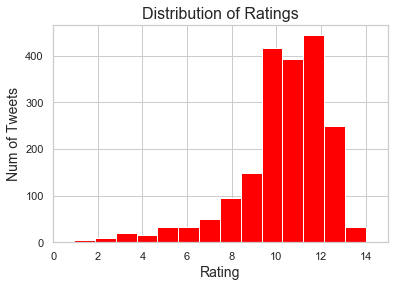

In [472]:

df['rating'].plot(kind = 'hist', bins = 15, color='red')

plt.xlim(0, 15)
plt.title('Distribution of Ratings', fontsize = 16)
plt.ylabel('Num of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)

plt.show();

The histogram above demonstrates that the distribution of ratings is very skewed to the left. We see that 75% of all ratings are between 10 and 14 inclusive. 
* (the IQR is from 10 to 12)

In [462]:
#What is the % of tweets with ratings of 10 and higher:

rating_10up_total = sum(df.rating >= 10)
rating_10up_perc = round(rating_10up_total * 100 / df.shape[0])
print("Number of tweets with rating 10+:  {}".format(rating_10up_total))
print("Percentage of tweets:                {}%".format(round(rating_10up_perc, 3)))

Number of tweets with rating 10+:  1534
Percentage of tweets:                79%


#### Distribution of dog stages:

In [458]:
#what stage is the most popular?


df.stage.value_counts()

none       1641
pupper     200 
doggo      70  
puppo      23  
floofer    8   
Name: stage, dtype: int64

Text(0.5, 1.0, 'The Distribution of Dog Stages')

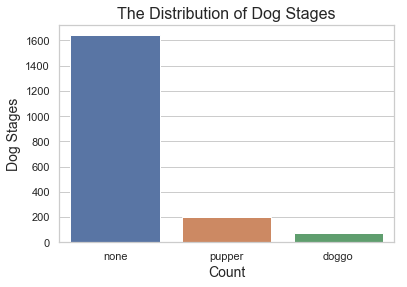

In [461]:
# including the none values, but it is best not to include that and only get the dog stages.
sorted_stage = df['stage'].value_counts().head(3).index
sb.set(style="whitegrid")
sb.countplot(data = df, x = 'stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('The Distribution of Dog Stages',fontsize=16)

In [475]:
#What are the 10 most common breeds of dogs tweeted about? (Excluding the category 'none':
str = "Number of tweets with 'none' predicted breed:  {} ({}%)"
none_count = sum(df.breed == 'none')
none_perc = none_count * 100 / df.shape[0]
print(str.format(none_count, round(none_perc)))

str = "Number of distinct breeds:  {}"
print(str.format(len(df.breed.unique())))

Number of tweets with 'none' predicted breed:  302 (16%)
Number of distinct breeds:  113


#### Top 10 Dog Breeds by tweet numbers

Breed and number of tweets
--------------------------
golden_retriever      153
Labrador_retriever    101
Pembroke              94 
Chihuahua             89 
pug                   62 
toy_poodle            49 
chow                  47 
Samoyed               41 
Pomeranian            40 
malamute              33 
Name: breed, dtype: int64

Top 10 dog breeds make up 37% of all tweets


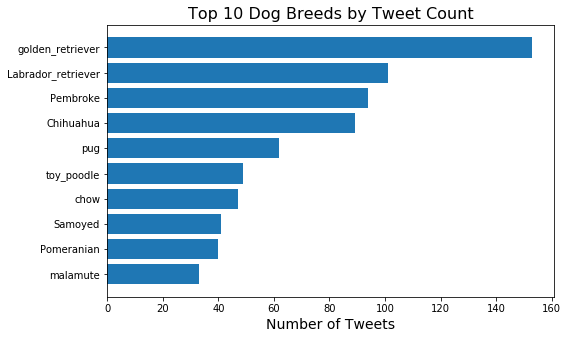

In [428]:
top10_breeds_count = \
df[df.breed != 'none'].breed.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / df.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))
plt.barh(top10_breeds_count.index, top10_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

#### Correlation map with rating:

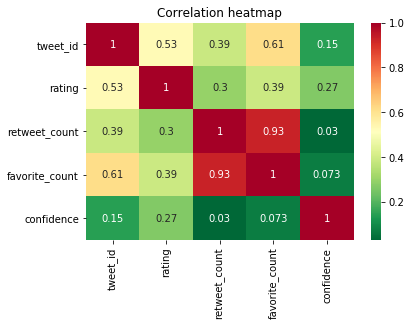

In [454]:
corr = df.corr()
plt.title('Correlation heatmap')
sb.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot = True,
           cmap='RdYlGn_r');

From the above heatmap, we see a strong correlation between retweet_counts and favorite_counts, let's explore this further

retween count and favorite count over time:

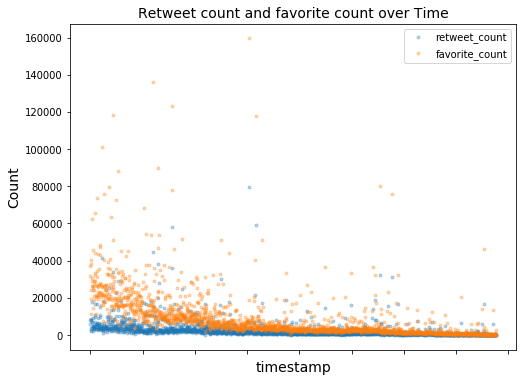

In [449]:

df.plot.line(y =['retweet_count', 'favorite_count'], style = '.', alpha = .3, figsize=(8,6))

plt.title('Retweet count and favorite count over Time', fontsize = 14)
plt.xlabel('timestamp', fontsize = 14)
plt.ylabel('Count', fontsize = 14);

Retweent counts and favourite tweets relationship given the dog ratings as colour - a multivariate analysis


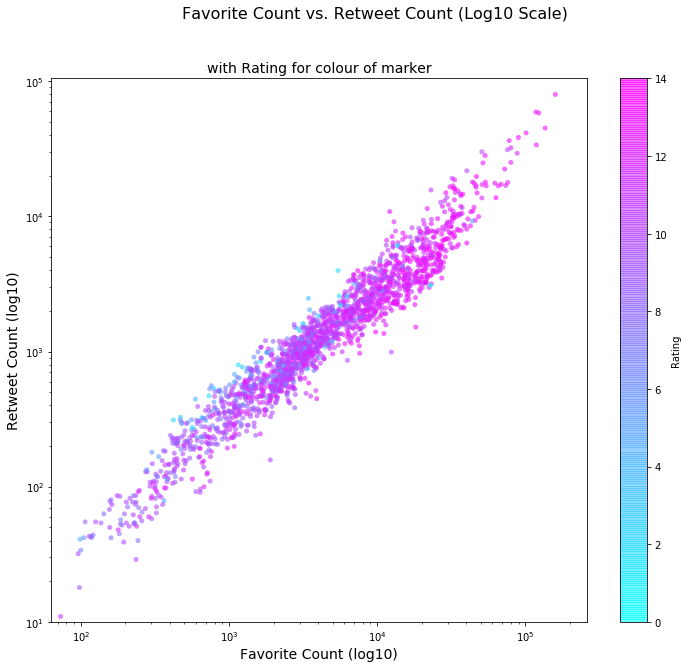

In [448]:
#referencing https://matplotlib.org/3.1.1/api/cm_api.html &
#referencing https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes




cmap = plt.cm.get_cmap('cool') # Colour map (there are many others)
plt.figure(figsize = (12, 10))

plt.xscale('log')
plt.yscale('log')
plt.xlim(df['favorite_count'].min() - 10, df['favorite_count'].max() + 100000)
plt.ylim(10, df['retweet_count'].max() + 25000)
colours = df['rating']
markers = 25

plt.scatter(df['favorite_count'], df['retweet_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.6)

# title and labels
plt.suptitle('Favorite Count vs. Retweet Count (Log10 Scale)', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Favorite Count (log10)', fontsize = 14)
plt.ylabel('Retweet Count (log10)', fontsize = 14)

# colour bar
cbar = plt.colorbar()
cbar.set_label('Rating')

plt.show();

In the above plot we can see a strong positive correlation between retweet counts and favorite counts. Align with this is that the high favorite counts and high retweets have higher dog ratings as well. 



# Insights:


* Distribution of ratings is skewed to the the left, 75% of all ratings falls between 10-14
* 79% of tweets has a rating of 10 or higher
* Pupper has the highest dog stage distribution
* There are 113 distinct breeds of dog and 302 unpredicted breeds in the data
* Top 10 dog breeds are (golden_retriever, Labrador_retriever, Pembroke, Chihuahua, pug,toy_poodle, chow,Samoyed,Pomeranian,and malamute)              
* Top 10 dog breeds take 37% of total tweets.
* There is a strong correlation between re-tweet counts and favourite counts.
* In the above plot we can see a strong positive correlation between retweet counts and favorite counts. Align with this is that the high favorite counts and high retweets have higher dog ratings as well.